# PROJECT DESCRIPTION

You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results

After loading the dataframe, we'll spend some time polishing it to ensure it’s ready to use. This data cleaning, consists of amending or removing incorrect or superfluous data, as well as checking for incompleteness or inconsistencies.

Then, I’ll begin to slice the data to extract meaningful insights from it. Using the techniques and methods of data analysis, I’ll look for hidden patterns and relationships, and find insights and predictions. After I’ve interpreted the results and drawn meaningful insights from them, the next step is to create visualizations by selecting the most appropriate charts and graphs.

### Initialization

Load libraries that are required for the project.

In [1]:
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl



### Load Data

Load the project data and have a look at the general information

In [2]:
try:
    data_hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')
    orders = pd.read_csv('/datasets/orders_us.csv', sep = ',')
    visits = pd.read_csv('/datasets/visits_us.csv', sep = ',')
    
except:
    data_hypotheses = pd.read_csv('https://code.s3.yandex.net/datasets/hypotheses_us.csv', sep = ';')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_us.csv', sep = ',')
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_us.csv', sep = ',')

In [3]:
data_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Description of the data

* Hypotheses — brief descriptions of the hypotheses
* Reach — user reach, on a scale of one to ten
* Impact — impact on users, on a scale of one to ten
* Confidence — confidence in the hypothesis, on a scale of one to ten
* Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


Description of the data:

* transactionId — order identifier
* visitorId — identifier of the user who placed the order
* date — of the order
* revenue — from the order
* group — the A/B test group that the user belongs to 

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Description of the data:

* date — date
* group — A/B test group
* visits — the number of visits on the date specified in the A/B test group specified

It seems that there aren't missing values.
As part of data preprocessing, I want to rename some columns with a more correct format and especially using only lowercases: this will simplify and speed up my code.

In [6]:
data_hypotheses.columns= data_hypotheses.columns.str.lower()

In [7]:
orders.columns=['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [8]:
data_hypotheses.head(10)

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [9]:
orders.head(10)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [10]:
visits.sample(10)

,date,group,visits
48,2019-08-18,B,737
36,2019-08-06,B,655
44,2019-08-14,B,746
16,2019-08-17,A,412
43,2019-08-13,B,769
8,2019-08-09,A,617
60,2019-08-30,B,490
23,2019-08-24,A,395
59,2019-08-29,B,531
0,2019-08-01,A,719


Another step that needs to be done, is to convert the datatype of the dates contained in the dataframes,from 'object' to the type 'datetime'. This step will save memory, will speed up the calculation and graph plots and will allow further analysis.

In [11]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [12]:
visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

I want to check if there are visitors who took part in the test in both groups A and B:

In [13]:
orders_b=orders.query('group =="B"')

In [14]:
orders_a=orders.query('group =="A"')

In [15]:
f=orders_b.merge(orders_a, on='visitor_id')

In [16]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 182
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id_x  183 non-null    int64         
 1   visitor_id        183 non-null    int64         
 2   date_x            183 non-null    datetime64[ns]
 3   revenue_x         183 non-null    float64       
 4   group_x           183 non-null    object        
 5   transaction_id_y  183 non-null    int64         
 6   date_y            183 non-null    datetime64[ns]
 7   revenue_y         183 non-null    float64       
 8   group_y           183 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 14.3+ KB


In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [18]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


So, we have visitors who belongs to both group a and b. The best course of action would be to eliminate these visitors from the analysis. The main problem is that the dataframe "visits" contains data which is already aggregated, so it would be impossible for me to remove these customers from Visits.
If we leave the customers that got into 2 tests, we get results that are not very reliable.
If we only remove them from one part of analysis and leave in another one - again we get bad the results.
So either way results can't be trusted, since I am working with pre-aggregated data.
I will just use the data as it is.

## Prioritizing Hypotheses

The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.

The task is to:

* **Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.**
* **Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.**
* **Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.**

We prioritize hypotheses in order to cut expenses on experimentation and test only the most promising ideas.

In this project we will look at two simple, but very useful techniques - RICE Scoring and the method of determining ICE priorities .

RICE Score Method

If you have several important and urgent features in the plan for implementation, how to understand which one to start first?

This important prioritization issue is at the core of all product management. The fee for choosing the wrong option may be too high.

It's a common situation: testing a hypothesis will cost a lot of money, but resources are limited. So I need to choose what to test and what to let go of. To try to ensure maximum growth of key business metrics, the hypotheses formulated have to be prioritized.

**ICE and RICE**

Impact, confidence, effort/ease (ICE) is one of the most popular ways of prioritizing problems

***RICE*** is a method for prioritizing product ideas and features. The abbreviation includes 4 factors that the product manager can safely use to evaluate and prioritize product features:

* Reach is how many users will be affected by the update you want to introduce
* Impact - how strongly this update will affect the users, their experience, and their satisfaction with the product
* Confidence - confidence in your assessment of coverage, impact and labor.
* Effort - labor costs

To get a score on RICE, you need to combine these factors.



RICE and ICE allow to define the most valuable tasks by calculating the score with the formulas. The higher the score the more profitable task for you. there's no need need to compare any criterion,just to choose the tasks with the highest score and work on it. That’s the easiest way to get things done. 

In [19]:
display(data_hypotheses)

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [20]:
print(data_hypotheses)

                                          hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   confidence  effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  


In [21]:
data_dict = data_hypotheses.hypothesis.to_dict()

In [22]:
display(data_dict)

{0: 'Add two new channels for attracting traffic. This will bring 30% more users',
 1: 'Launch your own delivery service. This will shorten delivery time',
 2: "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size",
 3: 'Change the category structure. This will increase conversion since users will find the products they want more quickly',
 4: 'Change the background color on the main page. This will increase user engagement',
 5: 'Add a customer review page. This will increase the number of orders',
 6: 'Show banners with current offers and sales on the main page. This will boost conversion',
 7: 'Add a subscription form to all the main pages. This will help you compile a mailing list',
 8: 'Launch a promotion that gives users discounts on their birthdays'}

ICE stands for Impact, Confidence, and Effort. With this method, you rate each idea on a numeric scale, usually 1-10, and then calculate a score for all ideas using the following equation:

ICE score = Impact x Effort x Confidence.



In [23]:
data_hypotheses['ICE']=((data_hypotheses['confidence']*data_hypotheses['impact'])/data_hypotheses['effort']).round()
display(data_hypotheses)
data__hypotheses_new=data_hypotheses[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)
pd.options.display.max_colwidth = 210


,hypothesis,reach,impact,confidence,effort,ICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.0
3,Change the category structure. This will incre...,8,3,3,8,1.0
4,Change the background color on the main page. ...,3,1,1,1,1.0
5,Add a customer review page. This will increase...,3,2,2,3,1.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.0


Here we see that hypotheses 8 is the clear winner, and should be prioritised. 

While ICE is definitely a cool tool to use, we need a more substantial method for prioritisation. This is where RICE can help.

In [24]:
data_hypotheses['RICE']=(data_hypotheses['reach']*data_hypotheses['confidence']*data_hypotheses['impact'])/data_hypotheses['effort']
display(data_hypotheses)
data_new=data_hypotheses[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)
print(data_new)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.0,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.0,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.0,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.0,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.0,16.2


                                                                                                               hypothesis  \
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
8                                                        Launch a promotion that gives users discounts on their birthdays   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
1                                                       Launch your own delivery service. This will shorten delivery time   


***By adding th reach parameter, we have a different vision of our hypotheses: the number 7 now looks like the one to prioritise since it will have a much higher reach, which means much more users will be affected by the change: on a scale from 1 to 10, the totality of the users will be  reached, giving a us a greater opportunity to boost revenue.***

## A/B Test Analysis
I carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Tasks that I will carry out in order to
Analyze the A/B test:
* Graph cumulative revenue by group. 
* Graph cumulative average order size by group. 
* Graph the relative difference in cumulative average order size for group B compared with group A.
* Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. 
* Plot a scatter chart of the number of orders per user.
* Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
* Plot a scatter chart of order prices. 
* Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
* Find the statistical significance of the difference in conversion between the groups using the raw data. 
* Find the statistical significance of the difference in average order size between the groups using the raw data. 
* Find the statistical significance of the difference in conversion between the groups using the filtered data.
* Find the statistical significance of the difference in average order size between the groups using the filtered data.


* Make a decision based on the test results. The possible decisions are: 
*   * 1. Stop the test, consider one of the groups the leader. 
    * 2. Stop the test, conclude that there is no difference between the groups. 
    * 3. Continue the test.

### Graph cumulative revenue by group.

In [25]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [26]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


To plot the graphs, we have to collect cumulative data. Let's declare a DataFrame called cumulative_data with the following columns:
* date
* group
* orders — the number of orders on the date specified for the group specified
* buyers — the number of users who make at least one order on the date specified for the group specified
* revenue — the revenue on the date specified for the group specified (average purchase size)
* visitors — the number of visitors to the online store on the date specified for the group specified
We'll build an array with unique paired date-group values using the drop_duplicates() method:


##### building an array with unique paired date-group values

In [27]:
dates_groups = orders[['date','group']].drop_duplicates()

Let's collect the aggregated cumulative daily data on orders in several steps.
In the first part of the code, we get the rows of the orders table where the date is less than or equal to the date of the datesGroups element and the test group is the same as in datesGroups:
orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].
In the second part, we aggregate the values. We find the maximum date. We'll find the maximum value for the group, too, so that we have the 'group' column in our final output. We find the number of unique order and user IDs and calculate the sum of average purchase sizes: .agg({'date' : 'max', 'group' : 'max', 'orderId' : pd.Series.nunique, 'userId' : pd.Series.nunique, 'revenue' : 'sum'})
We'll apply the methods to each row of the DataFrame (apply(axix=1)) and sort the results by the columns 'date' and 'group'. Putting this all together, we get:

In [28]:
dates_groups = orders[['date', 'group']].drop_duplicates()

orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': pd.Series.nunique,
            'visitor_id': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

print(orders_aggregated.head())


          date group  transaction_id  visitor_id  revenue
55  2019-08-01     A              24          20   2356.8
66  2019-08-01     B              21          20   1620.0
175 2019-08-02     A              44          38   3860.3
173 2019-08-02     B              45          43   4243.8
291 2019-08-03     A              68          62   5675.5


In [29]:
visits_aggregated = dates_groups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

print(visits_aggregated.head())

          date group  visits
55  2019-08-01     A     719
66  2019-08-01     B     713
175 2019-08-02     A    1338
173 2019-08-02     B    1294
291 2019-08-03     A    1845


In [30]:
cumulative_data = orders_aggregated.merge(
    visits_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

In [31]:
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]


In [32]:
cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


In [33]:
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

In [34]:
cumulative_data_a['cumul_rev']=cumulative_data_a['revenue'].cumsum()
cumulative_data_a.head()

C:\Users\User\AppData\Local\Temp\ipykernel_20576\3148436970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_data_a['cumul_rev']=cumulative_data_a['revenue'].cumsum()


,date,group,orders,buyers,revenue,visitors,cumul_rev
0,2019-08-01,A,24,20,2356.8,719,2356.8
2,2019-08-02,A,44,38,3860.3,1338,6217.1
4,2019-08-03,A,68,62,5675.5,1845,11892.6
6,2019-08-04,A,84,77,6822.1,2562,18714.7
8,2019-08-05,A,109,100,8810.2,3318,27524.9


In [35]:
cumulative_data_b['cumul_rev']=cumulative_data_b['revenue'].cumsum()
cumulative_data_b.head()

C:\Users\User\AppData\Local\Temp\ipykernel_20576\35565988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_data_b['cumul_rev']=cumulative_data_b['revenue'].cumsum()


,date,group,orders,buyers,revenue,visitors,cumul_rev
1,2019-08-01,B,21,20,1620.0,713,1620.0
3,2019-08-02,B,45,43,4243.8,1294,5863.8
5,2019-08-03,B,61,59,6050.6,1803,11914.4
7,2019-08-04,B,78,75,7767.9,2573,19682.3
9,2019-08-05,B,101,98,9262.9,3280,28945.2


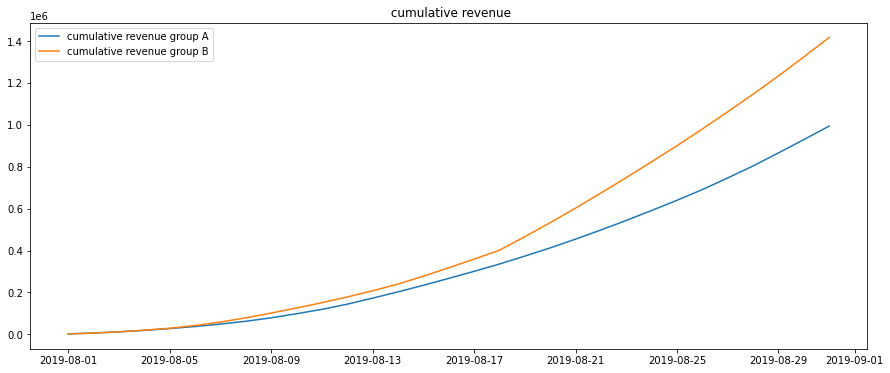

In [36]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(cumulative_data_a['date'], cumulative_data_a['cumul_rev'], label='cumulative revenue group A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['cumul_rev'], label='cumulative revenue group B')
plt.title(" cumulative revenue")
plt.legend()
plt.show()

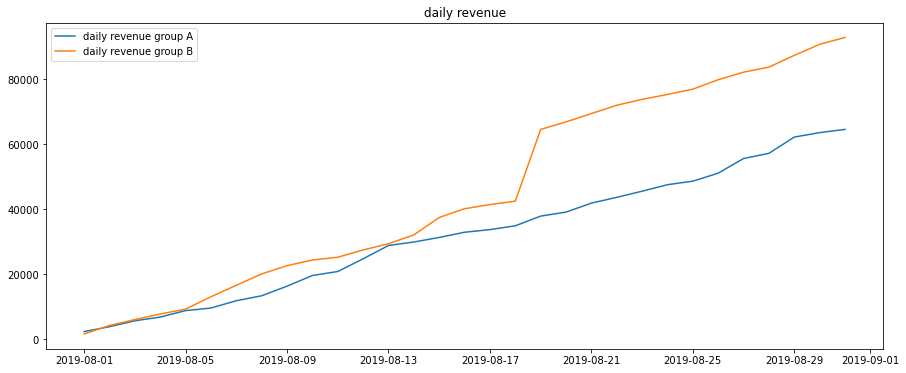

In [37]:
#general revenue per day 
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(cumulative_data_a['date'], cumulative_data_a['revenue'], label='daily revenue group A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['revenue'], label='daily revenue group B')
plt.title("daily revenue")
plt.legend()
plt.show()

Revenue is rising steadily throughout the whole test. That's a good sign.
However, we can see that group B sees a spike in revenue at certain points. This may imply either a surge in the number of orders or the presence of very expensive orders in the sample.

### Graph cumulative average order size by group.
### Graph the relative difference in cumulative average order size for group B compared with group A.

In [38]:
cumulative_data_a.head()

,date,group,orders,buyers,revenue,visitors,cumul_rev
0,2019-08-01,A,24,20,2356.8,719,2356.8
2,2019-08-02,A,44,38,3860.3,1338,6217.1
4,2019-08-03,A,68,62,5675.5,1845,11892.6
6,2019-08-04,A,84,77,6822.1,2562,18714.7
8,2019-08-05,A,109,100,8810.2,3318,27524.9


In [39]:
cumulative_data_a['cumul_orders']=cumulative_data_a['orders'].cumsum()
cumulative_data_a['cumul_avg_orders_size']=cumulative_data_a['cumul_rev']/cumulative_data_a['cumul_orders']
cumulative_data_a.head()

C:\Users\User\AppData\Local\Temp\ipykernel_20576\1559907445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_data_a['cumul_orders']=cumulative_data_a['orders'].cumsum()
C:\Users\User\AppData\Local\Temp\ipykernel_20576\1559907445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_data_a['cumul_avg_orders_size']=cumulative_data_a['cumul_rev']/cumulative_data_a['cumul_orders']


,date,group,orders,buyers,revenue,visitors,cumul_rev,cumul_orders,cumul_avg_orders_size
0,2019-08-01,A,24,20,2356.8,719,2356.8,24,98.200000
2,2019-08-02,A,44,38,3860.3,1338,6217.1,68,91.427941
4,2019-08-03,A,68,62,5675.5,1845,11892.6,136,87.445588
6,2019-08-04,A,84,77,6822.1,2562,18714.7,220,85.066818
8,2019-08-05,A,109,100,8810.2,3318,27524.9,329,83.662310


In [40]:
cumulative_data_b['cumul_orders']=cumulative_data_b['orders'].cumsum()
cumulative_data_b['cumul_avg_orders_size']=cumulative_data_b['cumul_rev']/cumulative_data_b['cumul_orders']
cumulative_data_b.head()

C:\Users\User\AppData\Local\Temp\ipykernel_20576\2252992407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_data_b['cumul_orders']=cumulative_data_b['orders'].cumsum()
C:\Users\User\AppData\Local\Temp\ipykernel_20576\2252992407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_data_b['cumul_avg_orders_size']=cumulative_data_b['cumul_rev']/cumulative_data_b['cumul_orders']


,date,group,orders,buyers,revenue,visitors,cumul_rev,cumul_orders,cumul_avg_orders_size
1,2019-08-01,B,21,20,1620.0,713,1620.0,21,77.142857
3,2019-08-02,B,45,43,4243.8,1294,5863.8,66,88.845455
5,2019-08-03,B,61,59,6050.6,1803,11914.4,127,93.814173
7,2019-08-04,B,78,75,7767.9,2573,19682.3,205,96.011220
9,2019-08-05,B,101,98,9262.9,3280,28945.2,306,94.592157


C:\Users\User\AppData\Local\Temp\ipykernel_20576\2646670988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_data_a['avg_orders_size']=cumulative_data_a['revenue']/cumulative_data_a['orders']
C:\Users\User\AppData\Local\Temp\ipykernel_20576\2646670988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_data_b['avg_orders_size']=cumulative_data_b['revenue']/cumulative_data_b['orders']


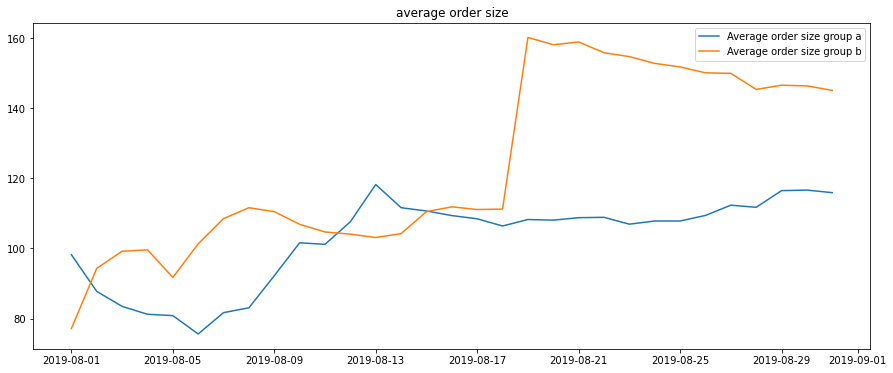

In [41]:
cumulative_data_a['avg_orders_size']=cumulative_data_a['revenue']/cumulative_data_a['orders']
cumulative_data_b['avg_orders_size']=cumulative_data_b['revenue']/cumulative_data_b['orders']
plt.plot(cumulative_data_a['date'], cumulative_data_a['avg_orders_size'], label='Average order size group a')
plt.plot(cumulative_data_b['date'], cumulative_data_b['avg_orders_size'], label='Average order size group b')
plt.title("average order size")
plt.legend()
plt.show()

It looks like the spike in the revenue for the group B is due to the presence of expensive orders around the date of 17-08-2019. after a couple of days we can notice that the there is still a big gap between the daily average order size for group B and group A, but the daily average order size for group B is slowly decreasing while for group A is slowly increasing.



let's examine the plot of cumulative average order size, to have a clearer view on the test:

If you plot a graph with cumulative data, at the first-day point you'll have metric values for that day, at the second-day point you'll have the sum of metrics for the first two days, and so on. That way you can track changes in the experimental results at each day of the test.
According to the central limit theorem, the values of cumulative metrics often converge and settle around a particular mean. Then a cumulative metric graph can help you decide whether to continue the test.

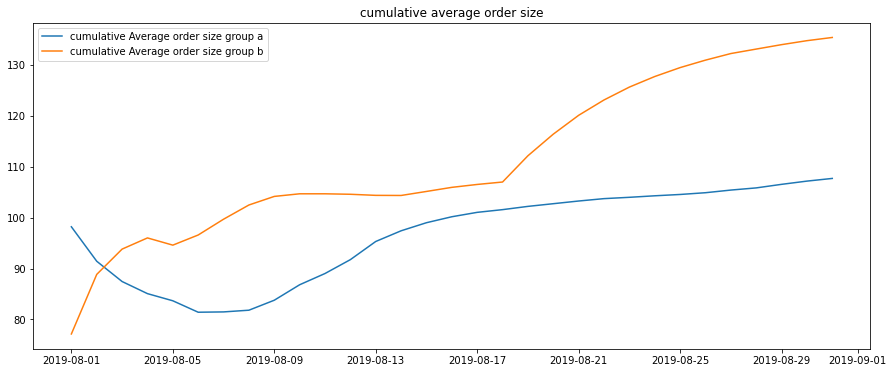

In [42]:
plt.plot(cumulative_data_a['date'], cumulative_data_a['cumul_avg_orders_size'], label='cumulative Average order size group a')
plt.plot(cumulative_data_b['date'], cumulative_data_b['cumul_avg_orders_size'], label='cumulative Average order size group b')
plt.title("cumulative average order size")
plt.legend()
plt.show()

On the date 17-08-2019 probably there was the introduction os some change that caused a surge in group B in terms of revenue and specifically in order size. the change that was implemented on group B caused the buyers of group B to place more expensive orders. after that date we see an increase in cumulative revenue for bor both groups, but on group B, that looks like a much more important growth.  

## Calculate each group's conversion rate as the ratio of buyers to the number of clicks for each day. Plot the daily conversion rates of the two groups and describe the difference.

In [43]:
cumulative_data_a['conversion']=cumulative_data_a['buyers']/cumulative_data_a['visitors']
cumulative_data_b['conversion']=cumulative_data_b['buyers']/cumulative_data_b['visitors']

C:\Users\User\AppData\Local\Temp\ipykernel_20576\1563432539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_data_a['conversion']=cumulative_data_a['buyers']/cumulative_data_a['visitors']
C:\Users\User\AppData\Local\Temp\ipykernel_20576\1563432539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_data_b['conversion']=cumulative_data_b['buyers']/cumulative_data_b['visitors']


In [44]:
cumulative_data_a.head()

,date,group,orders,buyers,revenue,visitors,cumul_rev,cumul_orders,cumul_avg_orders_size,avg_orders_size,conversion
0,2019-08-01,A,24,20,2356.8,719,2356.8,24,98.200000,98.200000,0.027816
2,2019-08-02,A,44,38,3860.3,1338,6217.1,68,91.427941,87.734091,0.028401
4,2019-08-03,A,68,62,5675.5,1845,11892.6,136,87.445588,83.463235,0.033604
6,2019-08-04,A,84,77,6822.1,2562,18714.7,220,85.066818,81.215476,0.030055
8,2019-08-05,A,109,100,8810.2,3318,27524.9,329,83.662310,80.827523,0.030139


In [45]:
cumulative_data_b.head()

,date,group,orders,buyers,revenue,visitors,cumul_rev,cumul_orders,cumul_avg_orders_size,avg_orders_size,conversion
1,2019-08-01,B,21,20,1620.0,713,1620.0,21,77.142857,77.142857,0.028050
3,2019-08-02,B,45,43,4243.8,1294,5863.8,66,88.845455,94.306667,0.033230
5,2019-08-03,B,61,59,6050.6,1803,11914.4,127,93.814173,99.190164,0.032723
7,2019-08-04,B,78,75,7767.9,2573,19682.3,205,96.011220,99.588462,0.029149
9,2019-08-05,B,101,98,9262.9,3280,28945.2,306,94.592157,91.711881,0.029878


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
Can you please additionally plot a relative difference graph for the cumulative conversion rates and order size, as based on the graph above it is difficult to say smth about data stability and which group has higher conversion rate.

<div class="alert alert-info"> <b>Student comments:</b> Thank you for the feedback. Following: </div>    

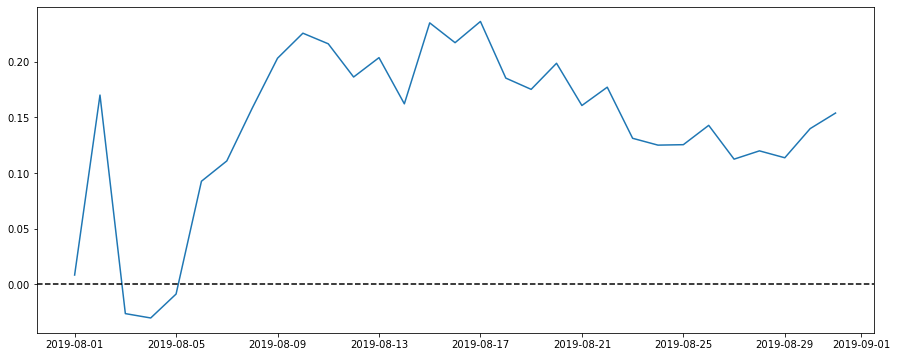

In [46]:
# gathering the data into one DataFrame
mergedCumulative = cumulative_data_a.merge(cumulative_data_b, on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the conversion
plt.plot(mergedCumulative['date'], ((mergedCumulative['conversionB']/(mergedCumulative['conversionA'])-1)))

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

The B group consistently demonstrates better conversion rates than the A group, and the difference is stabilizing with time. If there's enough data to reach the significance level, we may as well stop the test, since the B group is definitely better than A.

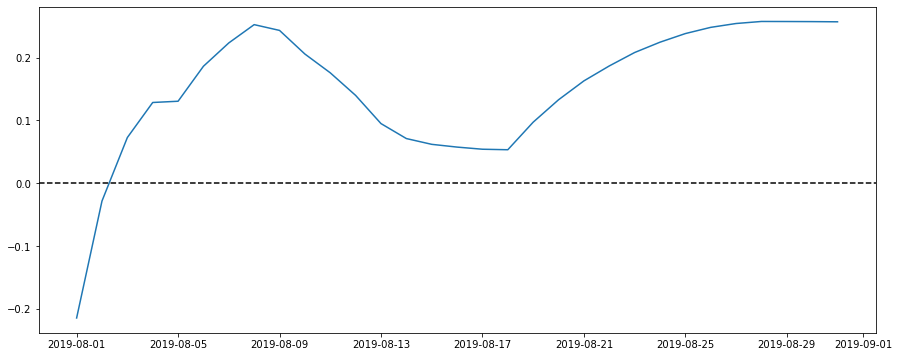

In [47]:
# plotting a relative difference graph for the average cumulative  order size
plt.plot(mergedCumulative['date'], ((mergedCumulative['cumul_avg_orders_sizeB']/(mergedCumulative['cumul_avg_orders_sizeA'])-1)))

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

group b has bigger order size.

Both metrics are stabilizing. We could stop the test.

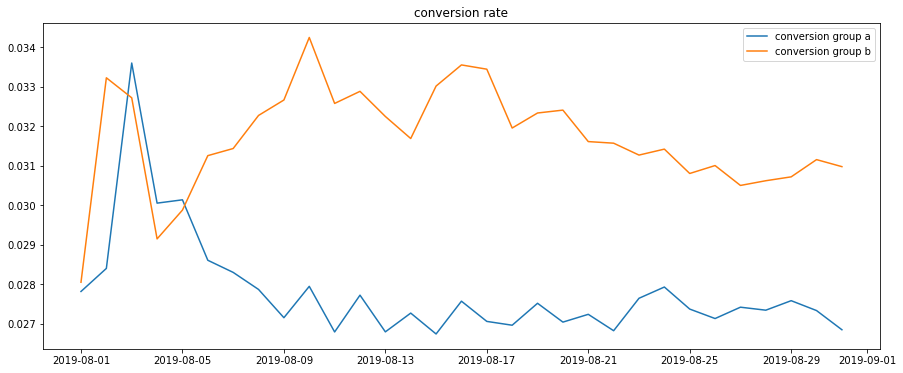

In [48]:
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='conversion group a')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='conversion group b')
plt.title("conversion rate")
plt.legend()
plt.show()

*** overall conversion GROUP A:***

In [49]:
cumulative_data_a['buyers'].sum()/cumulative_data_a['visitors'].sum()

0.027418188718009114

*** overall conversion GROUP B: ***

In [50]:
cumulative_data_b['buyers'].sum()/cumulative_data_b['visitors'].sum()

0.03164198350982767

The daily results fluctuate strongly, but it's possible to tell that after 05-08-2019 the daily conversion of group B shows an iimportant peak upward and then is generally much higher that conversion of group A. After taht date, on the contrary, daily conversion of Group A sees a  drop and stays low. 

I am not sure though, since I am not fully aware of the industry we are talking about, if the difference between 2.7 percent and 3.5 percent in conversion rate, is actually a very significant change or it just a better conversion( which never hurts!)

## Plot a scatter chart of the number of orders per user. 

In [51]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [52]:
orders_by_users = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

orders_by_users.columns = ['visitor_id', 'orders']

print(orders_by_users.sort_values(by='orders', ascending=False).head(10))

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


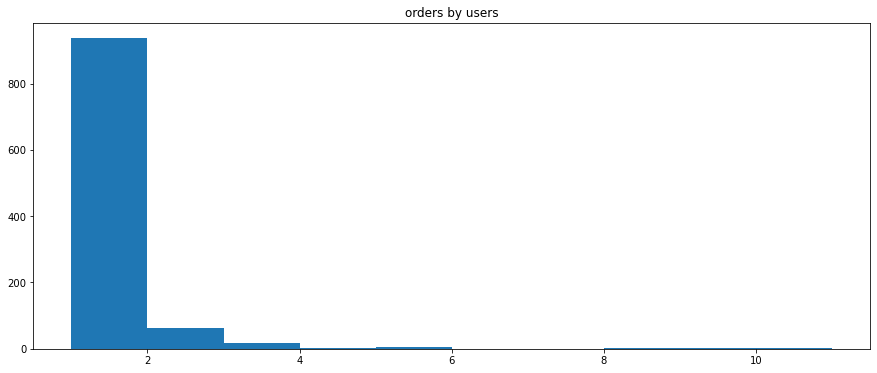

In [53]:
plt.hist(orders_by_users['orders'])
plt.title("orders by users")
plt.show()

The majority of users made one order. however it's not clear how many users made two, three or more.

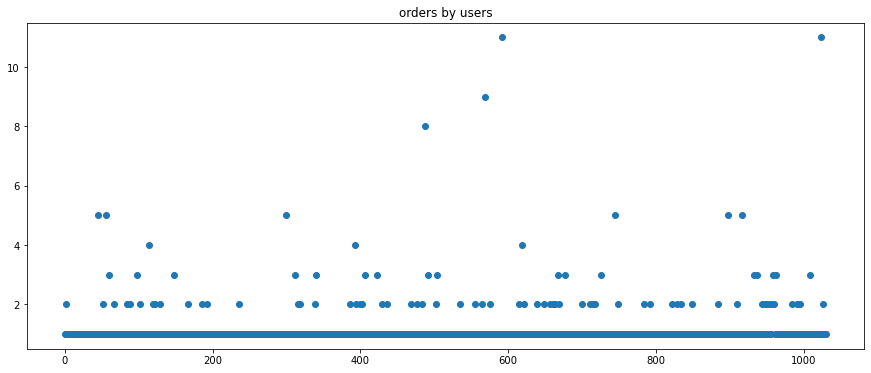

In [54]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values,orders_by_users['orders'])
plt.title("orders by users")
plt.show()

There are very few users with more than two orders. These cases may be anomalies. To find out if two orders are a typical number or an anomaly, I will calculate percentiles.

## Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [55]:
print(np.percentile(orders_by_users['orders'], [ 95, 99 ])) 

[2. 4.]


not more than 5% of users placed more than two orders and not more than 1% placed more than four.

## Plot a scatter chart of order prices. Make conclusions and conjectures.

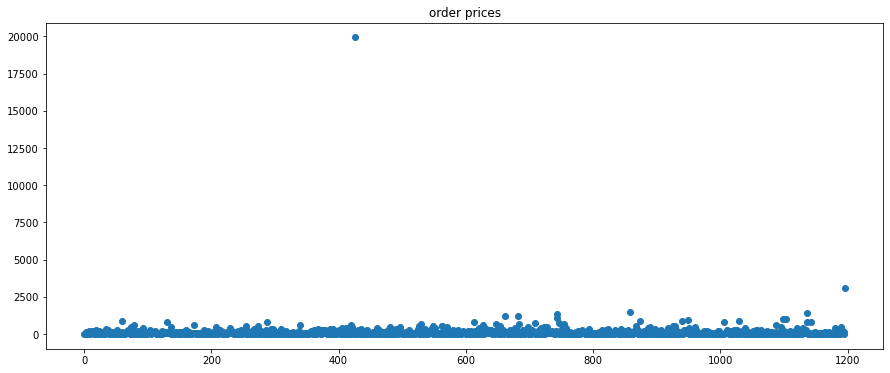

In [56]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title("order prices")
plt.show()

## Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [57]:
print(np.percentile(orders['revenue'], [95, 99])) 

[435.54  900.904]


not more than 5% of users placed orders form more than 435.54 $ and not more than 1% of buyers spent more than 900.904 on a single order


## Find the statistical significance of the difference in conversion between the groups using the raw data.

Let's calculate the statistical significance of the difference in conversion between the groups.
We'll create the variables orders_by_usersA and orders_by_usersB to store the columns ['user_id', 'orders']. For users with at least one order, we'll indicate the number of orders made.

H0: There is not a statistically significant difference in conversion rates for the tested group and for the control group.         Both Group A and group B conversion rates are equal

H1: There is a statistically significant differencein conversion rates for the tested group and for the control group.             Group A and group B conversion rates differs.

In [58]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [59]:
orders_by_usersA = orders[orders['group']=='A'].groupby('visitor_id').agg({'visitor_id' : pd.Series.nunique})
orders_by_usersA .columns = ['orders']
orders_by_usersA=orders_by_usersA.reset_index()

In [60]:
orders_by_usersB = orders[orders['group']=='B'].groupby('visitor_id').agg({'visitor_id' : pd.Series.nunique})
orders_by_usersB .columns = ['orders']
orders_by_usersB=orders_by_usersB.reset_index()

Now we'll declare the variables sampleA and sampleB, with users from different groups and corresponding numbers of orders. Those who didn't order anything will have 0. This is necessary to prepare the samples for the Mann-Whitney test.
sampleA must have two parts:
A list of the number of orders for each user: ordersByUsersA['orders'].
Zeroes for users who didn't order anything. Their number is the difference between the total number of visitors and the number of records on orders: visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])



In [61]:
sampleA = pd.concat([orders_by_usersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_by_usersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_by_usersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_by_usersB['orders'])), name='orders')],axis=0)

We'll apply the criterion and format the p-value by rounding it to three decimal places.
Remember that sampleA stores a sample where each element is the number of orders made by a certain user, including zeroes. So the number of sampleA elements is the number of users, and the sum of all the elements is the number of orders. To get the group's conversion rate, we'll need to divide the sum of the orders by the number of users. Using the mean() method, we'll find the mean for sampleA. We'll find the conversion rate for group B in a similar way: sampleB.mean().

Let's print the relative conversion gain for group B: group B conversion / group A conversion - 1. We'll round the value to three decimal places.

In [62]:
alpha = .05 #significance level

results = st.mannwhitneyu(sampleA, sampleB)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 

p-value:  0.016746169422850104
Null hypothesis rejected: the difference is statistically significant


In [63]:

print("relative conversion gain for group B:", (sampleB.mean()/sampleA.mean()-1)) 

relative conversion gain for group B: 0.1539239925219249


***Conclusion: based on the raw data, there is statistical difference in conversion between groups A and B.***
The first row of the output gives us the p-value, 0.017, which is lower than 0.05. So we reject the null hypothesis that there's not a statistically significant difference in conversion between the groups.The relative gain of group B is 15.4 (the second row of the output).


### Find the statistical significance of the difference in average order size between the groups using the raw data. 


H0: There is not a statistically significant difference in average order size  for the tested group and for the control group.         Both Group A and group B average order size  are equal

H1: There is a statistically significant difference in average order size  for the tested group and for the control group.             Group A and group B average order size  differs.

To calculate the statistical significance of the difference in the segments' average order size, we'll pass the data on revenue to the mannwhitneyu() criterion.
We'll also find the relative difference in average order size between the groups:

In [64]:
alpha = .05 #significance level

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 

p-value:  0.6915246773264736
Failed to reject the null hypothesis: we can't make conclusions about the difference


In [65]:

print('relative difference in average order size between the groups:', 
      (orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

relative difference in average order size between the groups: 0.25165300678182323


The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis ( H0= there is no difference between group A and B) and conclude that average order size differs between the groups. Despite what has just been said, the average order size for group B is much higher than it is for group A.

### Find the statistical significance of the difference in conversion between the groups using the filtered data. .

Remember that the 95th and 99th percentiles for average order size, which you found in the preceding lessons, were 435,547 and 900.904. The 95th and 99th percentiles for the number of orders per user were 2 and 4 orders.
Let's define anomalous users as those who place more than two orders or one order bigger than 600. Thus we'll remove the 5 percent of users with the largest numbers of orders and from 1 percent to 5 percent of the users with the most expensive orders. Let's make data slices with the users who placed more than two orders (users_many_orders) and the users who placed orders for more than  600 (users_expensive_orders). We'll join them in a table called abnormal_users.

In [66]:
orders_by_usersA

,visitor_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,1
500,4259830713,1
501,4266935830,1


In [67]:
users_many_orders = pd.concat([orders_by_usersA[orders_by_usersA['orders'] > 2]['visitor_id'],orders_by_usersB [orders_by_usersB['orders'] > 2]['visitor_id']], axis = 0)
users_expensive_orders = orders[orders['revenue'] > 600]['visitor_id']
abnormal_users = pd.concat([users_many_orders,users_expensive_orders ], axis = 0).drop_duplicates().sort_values()
print(abnormal_users.head(5))
print(abnormal_users.shape)

1099    148427295
684     358944393
648     382846391
1137    759473111
339     834731816
Name: visitor_id, dtype: int64
(29,)


We have 14 anomalous users in total.

Let's try to find out how their actions affected the test results. We'll calculate the statistical significance of the differences in conversion between the groups, using filtered data. First we'll prepare samples of the number of orders per user for each test group:

In [68]:
sampleA_filtered = pd.concat([orders_by_usersA[np.logical_not(orders_by_usersA['visitor_id'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_by_usersA['orders'])),name='orders')],axis=0)

sampleB_filtered = pd.concat([orders_by_usersB[np.logical_not(orders_by_usersB['visitor_id'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_by_usersB['orders'])),name='orders')],axis=0)

Let's apply the statistical Mann-Whitney criterion to the resulting samples:

In [69]:
alpha = .05 #significance level

results = st.mannwhitneyu(sampleA_filtered, sampleB_filtered)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 

p-value:  0.010596721973880818
Null hypothesis rejected: the difference is statistically significant


In [70]:
print("relative conversion gain for group B:", sampleB_filtered.mean()/sampleA_filtered.mean())

relative conversion gain for group B: 1.1682672568376067


The results for conversion almost didn't change. Let's see what happens to the values for average order size:

### Find the statistical significance of the difference in average order size between the groups using the filtered data.


In [71]:
print('{0:.3f}'.format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean() - 1))

0.516
0.066


The p-value decreased, but now the difference in average order size between group B and group A is 6% instead of 25%.

### Make a decision based on the test results

* There's a statistically significant difference in conversion between the groups, according to both the raw and the filtered data.
* The raw data and the filtered data didn't show a statistically significant difference between the groups in terms of average purchase size. 
* The graph of the difference in conversion between the groups shows that group B's results are better than those of group A: they have a tendency to grow or have stabilized around the mean.


Stop the test, the hypotheses tested was a success, and move on to the next hypothesis.

### SUMMARY OF THE ANALYSIS

The goal iof this analysis was to prioritize and test a list of hypotheses that may help boost revenue. To do so, I completed an analysis which consisted in the following steps:

*  Data cleaning, consists of amending or removing incorrect or superfluous data, as well as checking for incompleteness or inconsistencies.

* Prioritize the hypothesis, in order to choose one (the best one) to test. I did so using the 'ICE and RICE' method.

* I conducted an A/B test and analize t's results by focusing on cumulative metrics: A/B testing helps reveal the differences between groups, if there are any. We compared  metrics:
Conversion,
Average purchase size

* I determined that there is a statistical difference in conversion, which means the hipotheses tested helped to boost revenue.

